In [1]:
! pip install scikit-learn


[[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8], [0.9], [1.0], [1.1], [1.2], [1.3], [1.4], [1.5], [1.6], [1.7], [1.8], [1.9], [2.0], [2.1], [2.2], [2.3], [2.4], [2.5], [2.6], [2.7], [2.8], [2.9], [3.0], [3.1], [3.2], [3.3], [3.4], [3.5], [3.6], [3.7], [3.8], [3.9], [4.0], [4.1], [4.2], [4.3], [4.4], [4.5], [4.6], [4.7], [4.8], [4.9], [5.0], [5.1], [5.2], [5.3], [5.4], [5.5], [5.6], [5.7], [5.8], [5.9], [6.0], [6.1], [6.2], [6.3], [6.4], [6.5], [6.6], [6.7], [6.8], [6.9], [7.0], [7.1], [7.2], [7.3], [7.4], [7.5], [7.6], [7.7], [7.8], [7.9], [8.0], [8.1], [8.2], [8.3], [8.4], [8.5], [8.6], [8.7], [8.8], [8.9], [9.0], [9.1], [9.2], [9.3], [9.4], [9.5], [9.6], [9.7], [9.8], [9.9], [10.0]]
[8.29813332, 4.919282026, 4.145139259, 6.850787513, 6.375322852, 8.669000322, 5.892481004, 5.140961359, 7.182105946, 7.213212036, 9.973354602, 10.44698278, 9.161841089, 9.641131112, 9.931191283, 11.75007591, 11.38056547, 8.299219925, 10.80440773, 9.579552987, 11.83050005, 12.31880885, 12.41958453,

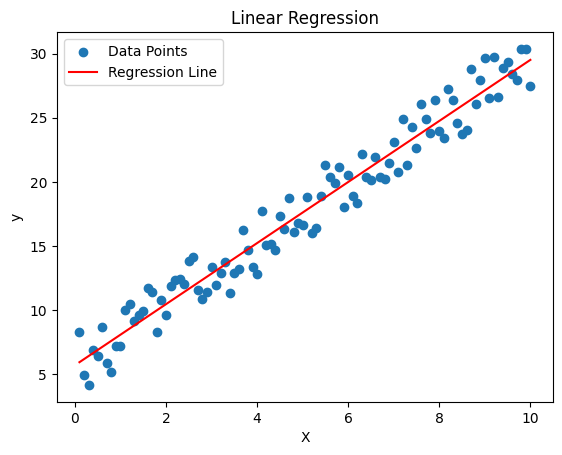

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score



def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def multiply_matrices(A, B):
    result = [[0] * len(B[0]) for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def invert_matrix(matrix):
    n = len(matrix)

    identity = [[0] * n for _ in range(n)]
    for i in range(n):
        identity[i][i] = 1

    for col in range(n):
        diagonal_element = matrix[col][col]
        for j in range(n):
            matrix[col][j] /= diagonal_element
            identity[col][j] /= diagonal_element

        for i in range(n):
            if i != col:
                factor = matrix[i][col]
                for j in range(n):
                    matrix[i][j] -= factor * matrix[col][j]
                    identity[i][j] -= factor * identity[col][j]

    return identity

def linear_regression_matrix_inverse(X, y):
    X_b = [[1] + row for row in X]

    X_transpose = transpose(X_b)
    XTX_inv = invert_matrix(multiply_matrices(X_transpose, X_b))
    XTY = multiply_matrices(X_transpose, [[yi] for yi in y])

    beta = multiply_matrices(XTX_inv, XTY)

    return [entry[0] for entry in beta]

def regression_equation(coefficients):
    degree = len(coefficients) - 1
    equation = f"y = {coefficients[0]}"
    for i in range(1, degree + 1):
        equation += f" + {coefficients[i]} * X^{i}"
    return equation

file_path = 'Data1.csv' 
with open(file_path, 'r') as file:
    reader = csv.reader(file)

    header = next(reader, None)

    data = []
    for row in reader:
        try:
            data.append(list(map(float, row)))
        except ValueError as e:
            print(f"Skipping row {row}: {e}")

X = [row[:-1] for row in data]
print(X)
y = [row[-1] for row in data]
print(y)

coefficients = linear_regression_matrix_inverse(X, y)

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"  Coefficient {i}: {coef}")

equation = regression_equation(coefficients)
print("\nRegression Equation:")
print(equation)
print("Degree of Polynomial:", len(coefficients) - 1)


if X:
    num_features = len(X[0])
    if num_features > 1:
        print("Plotting is supported for datasets with only one feature.")
    else:
        X_values = [row[0] for row in X]
        plt.scatter(X_values, y, label="Data Points")

        X_range = np.linspace(min(X_values), max(X_values), 100)
        y_pred = [coefficients[0] + coefficients[1] * x for x in X_range]

        plt.plot(X_range, y_pred, color='red', label="Regression Line")

        plt.legend()
        plt.title("Linear Regression")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()
else:
    print("Empty dataset. Unable to plot.")

In [7]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(y).reshape(-1, 1)
regr.fit(x_array,y_array)
print("beta: ",regr.coef_)
alpha = (regr.intercept_)
print("alpha: ", alpha)

beta:  [[2.38406007]]
alpha:  [5.68078713]


In [3]:


predicted_Y = [coefficients[0] + coefficients[1] * x[0] for x in X]
print(predicted_Y)
print(len(predicted_Y))

mae = mean_absolute_error(y_true=y, y_pred=predicted_Y)
mse = mean_squared_error(y_true=y, y_pred=predicted_Y)
rmse = np.sqrt(mse)
r_square = r2_score(y_true=y, y_pred=predicted_Y)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R_square:", r_square)

[5.919193133366935, 6.157599139972653, 6.396005146578372, 6.63441115318409, 6.8728171597898084, 7.1112231663955265, 7.349629173001245, 7.588035179606964, 7.826441186212682, 8.0648471928184, 8.303253199424118, 8.541659206029836, 8.780065212635554, 9.018471219241272, 9.256877225846992, 9.49528323245271, 9.733689239058428, 9.972095245664146, 10.210501252269864, 10.448907258875582, 10.6873132654813, 10.925719272087019, 11.164125278692737, 11.402531285298455, 11.640937291904173, 11.879343298509891, 12.11774930511561, 12.356155311721327, 12.594561318327047, 12.832967324932765, 13.071373331538483, 13.309779338144203, 13.54818534474992, 13.786591351355638, 14.024997357961357, 14.263403364567075, 14.501809371172794, 14.740215377778512, 14.97862138438423, 15.217027390989948, 15.455433397595666, 15.693839404201384, 15.932245410807102, 16.17065141741282, 16.40905742401854, 16.647463430624256, 16.885869437229978, 17.124275443835693, 17.362681450441414, 17.60108745704713, 17.83949346365285, 18.07789

In [4]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
y_pred_sklearn = model_sklearn.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r_square = r2_score(y,y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
print("mean_absolute_error:",mae_sklearn)
print("Mean Squared Error (scikit-learn):", mse_sklearn)
print("root Mean Squared Error (scikit-learn):", rmse_sklearn)
print("r_sqaure(scikit_learn):",r_square)

mean_absolute_error: 1.280555978429147
Mean Squared Error (scikit-learn): 2.078525401777328
root Mean Squared Error (scikit-learn): 1.4417091945941551
r_sqaure(scikit_learn): 0.9579571905586357


In [5]:
import csv
import numpy as np

def gradient_descent(X, y, learning_rate=0.0001, epochs=10000):
    X_b = np.c_[np.ones((len(X), 1)), X]

    beta = np.zeros(X_b.shape[1])

    for _ in range(epochs):
        gradients = -2 * X_b.T.dot(y - X_b.dot(beta))
        beta -= learning_rate * gradients

    return beta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

file_path = 'Data1.csv'  
with open(file_path, 'r') as file:
    reader = csv.reader(file)

    header = next(reader, None)

    data = []
    for row in reader:
        try:
            data.append(list(map(float, row)))
        except ValueError as e:
            print(f"Skipping row {row}: {e}")

X = np.array([row[:-1] for row in data])
y = np.array([row[-1] for row in data])


coefficients_gradient_descent = gradient_descent(X, y)

X_b_train = np.c_[np.ones((len(X), 1)), X]
y_pred_train = X_b_train.dot(coefficients_gradient_descent)

mae_gradient_descent = mean_absolute_error(y,y_pred_train)
mse_gradient_descent = mean_squared_error(y, y_pred_train)
rmse_gradient_descent = np.sqrt(mse_gradient_descent)
rsquare_gradient_descent = r2_score(y, y_pred_train)


print("Coefficients (Gradient Descent):", coefficients_gradient_descent)
print("Mean absolute Error (Gradient Descent):", mae_gradient_descent)
print("Mean Squared Error (Gradient Descent):", mse_gradient_descent)
print("root Mean Squared Error (Gradient Descent):", rmse_gradient_descent)
print("R Squared Error (Gradient Descent):", rsquare_gradient_descent)




Coefficients (Gradient Descent): [5.68078713 2.38406007]
Mean absolute Error (Gradient Descent): 1.2805559784291471
Mean Squared Error (Gradient Descent): 2.078525401777327
root Mean Squared Error (Gradient Descent): 1.441709194594155
R Squared Error (Gradient Descent): 0.9579571905586357


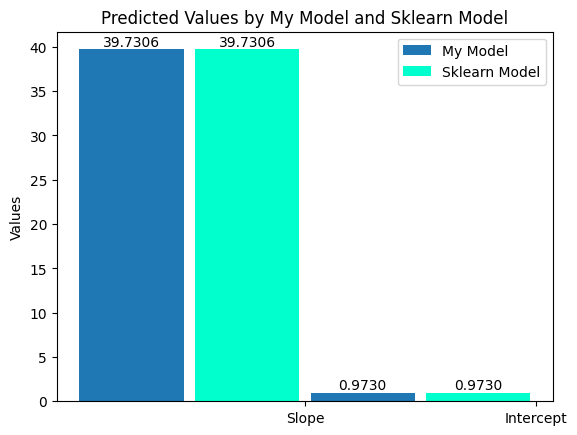

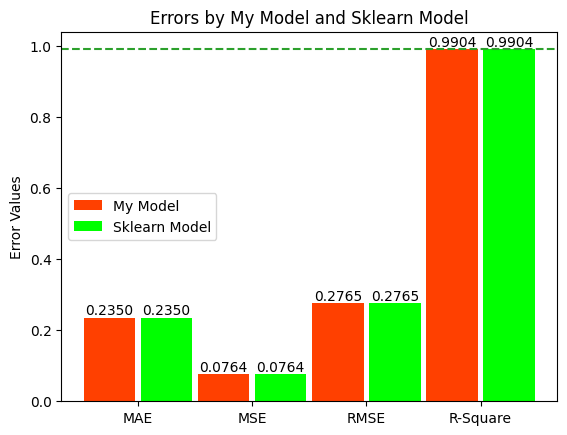

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Predicted_values_by_my_model = [39.7306395177676,0.9729974518460589] #alpha, bita
Predicted_values_by_Sklearn_model = [39.73063952, 0.97299745]

Error_by_my_model = [0.2349883528902577,
 0.07643342704351971,
 0.27646596000867757,
 0.9904038522690993]

Error_by_Sklearn_model = [0.23498835289025738,
 0.07643342704351966,
 0.27646596000867746,
 0.9904038522690993]

# Function to add values on top of bars
def add_values(bars, values):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.00005, bar.get_height() + 0.00005, f'{value:.4f}', ha='center', va='bottom')

# Grouped bar chart for predicted values
labels = ['Slope', 'Intercept']
width = 0.5

fig, ax = plt.subplots()
bar_width = 0.45
bar1 = ax.bar(np.arange(len(labels)) - (width / 2)-0.5, Predicted_values_by_my_model, bar_width, label='My Model', color='#1f77b4')
bar2 = ax.bar(np.arange(len(labels)) + (width / 2)-0.5, Predicted_values_by_Sklearn_model, bar_width, label='Sklearn Model', color='#00ffcc')

ax.set_ylabel('Values')
ax.set_title('Predicted Values by My Model and Sklearn Model')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of the bars
add_values(bar1, Predicted_values_by_my_model)
add_values(bar2, Predicted_values_by_Sklearn_model)

# Display the grouped bar chart for predicted values
plt.show()

# Grouped bar chart for errors with horizontal line for R-Square
error_labels = ['MAE', 'MSE', 'RMSE', 'R-Square']
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(error_labels)) - width / 2, Error_by_my_model, bar_width, label='My Model', color='#ff4000')
bar2 = ax.bar(np.arange(len(error_labels)) + width / 2, Error_by_Sklearn_model, bar_width, label='Sklearn Model', color='#00ff00')

ax.set_ylabel('Error Values')
ax.set_title('Errors by My Model and Sklearn Model')
ax.set_xticks(np.arange(len(error_labels)))
ax.set_xticklabels(error_labels)
ax.legend()

# Add values on top of the bars
add_values(bar1, Error_by_my_model)
add_values(bar2, Error_by_Sklearn_model)

# Add a horizontal line for R-Square
rsquare_value = 0.9904038522690993  # Change this value to the actual R-Square value
plt.axhline(y=rsquare_value, color='#2ca02c', linestyle='--', label=f'R-Square: {rsquare_value:.4f}')

# Display the grouped bar chart for errors with the horizontal line for R-Square
plt.show()
